In [22]:
#Importing libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [23]:
#==================================================================
#Loading the data
#The data is in the data folder, which is in the same directory as this notebook
#The data is in CSV format, so we can use pandas to read it
#===================================================================

listings_df = pd.read_csv('data/listings.csv')
reviews_df = pd.read_csv('data/reviews.csv')
listings_df.shape, listings_df.columns, listings_df.head(5), listings_df.tail(5)
reviews_df.shape, reviews_df.columns, reviews_df.head(5), reviews_df.tail(5)


((251066, 13),
 Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name',
        'review_score_rating', 'review_scores_accuracy',
        'review_score_cleanliness', 'review_score_checkin',
        'review_score_communication', 'review_score_location',
        'review_score_value', 'comments'],
       dtype='object'),
    listing_id      id        date  reviewer_id         reviewer_name  \
 0       44077  203703  2011-03-20       393348             Christian   
 1       44077  211369  2011-03-28       444004               Solidea   
 2       44077  234215  2011-04-21       465058  Michael And Isabelle   
 3       44077  261843  2011-05-13       490005                Weston   
 4       44077  268148  2011-05-17       520460               Barbara   
 
    review_score_rating  review_scores_accuracy  review_score_cleanliness  \
 0                  4.0                     5.0                       5.0   
 1                  4.0                     4.0                       4.0   

In [24]:
#=======================================================
#Data Cleaning (exrtacing the id from the url)
#=======================================================
def extract_id(url):
    if(type(url) != str):
        return np.NaN
    else:
        return url.strip().split('/')[-1]

In [25]:
#=======================================================
#Updating the listings_df dataframe with the new column
#=======================================================

listings_df['listing_id'] = listings_df["listing_url"].apply(extract_id)
listings_df.head()

,listing_url,name,description,neighborhood_overview,host_name,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,listing_id
0,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,2,NaN,1.0,2.0,"[""Shower gel"", ""Freezer"", ""Private backyard \u...",78.0,44077
1,https://www.airbnb.com/rooms/3592153,Victorian House 4 Bed City Centre Ballsbridge D4,Enjoy staying in a large house in the center o...,Our neighbourhood is in one of the best locati...,Conor,t,"Ballsbridge, Dublin, Ireland",Dublin City,53.33219,-6.22718,Entire home/apt,8,NaN,4.0,4.0,"[""Luggage dropoff allowed"", ""Private backyard ...",1186.0,3592153
2,https://www.airbnb.com/rooms/3604420,"Self Catering Barge, Tig Beatha",Tig Beatha is a self catering cruising barge l...,NaN,Trish,f,NaN,Dublin City,53.34736,-6.22631,Entire home/apt,3,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Indoor firepla...",165.0,3604420
3,https://www.airbnb.com/rooms/3604440,Beautful Apt in Iconic Millenium Tower @ Dockl...,"This is a beautiful, bright, airy and spacious...",The Apt is located right in the heart of Dubli...,Kieran,t,"Ringsend, Dublin, Ireland",Dublin City,53.34407,-6.23630,Entire home/apt,6,NaN,3.0,3.0,"[""Hair dryer"", ""Refrigerator"", ""First aid kit""...",1219.0,3604440
4,https://www.airbnb.com/rooms/3622736,Beautiful House with Garden in City,Charming family house with beautiful garden on...,NaN,Katie,f,NaN,Dublin City,53.33605,-6.27914,Entire home/apt,4,NaN,3.0,3.0,"[""Kitchen"", ""Wifi"", ""Heating"", ""Washer"", ""Free...",190.0,3622736


In [26]:
#======================================================================================
#Data Exploration to understand the data better
#======================================================================================
name_number = listings_df['host_name'].nunique()
print(f"Number of unique host names: {name_number}")

share_room_num = (listings_df['room_type'] == 'Shared room').sum()
print(f"Number of shared rooms: {share_room_num}")


neighborhoods_table = listings_df['neighbourhood_cleansed'].value_counts().reset_index()
neighborhoods_table.columns = ['Town', 'Count']
print("=============Neighborhoods table=============")
print(neighborhoods_table)



Number of unique host names: 2399
Number of shared rooms: 255
=============Neighborhoods table=============
                    Town  Count
0            Dublin City   5895
1  Dn Laoghaire-Rathdown    848
2                 Fingal    765
3           South Dublin    350


In [27]:
#======================================================================================
#More exploration of the data just split for better readability
#======================================================================================
average_price = listings_df['price_cleaned'].mean()
print(f"The average rental price in the dataset is: €{average_price:.2f}")

beaut_freq = listings_df['name'].str.contains('Beautiful', case=True).sum()
print(f"The word 'Beautiful' appears {beaut_freq} times in the name column")

top_hosts = listings_df['host_name'].value_counts().head(10)
print("=============Top 10 Hosts=============")
print(top_hosts)

KeyError: 'price_cleaned'

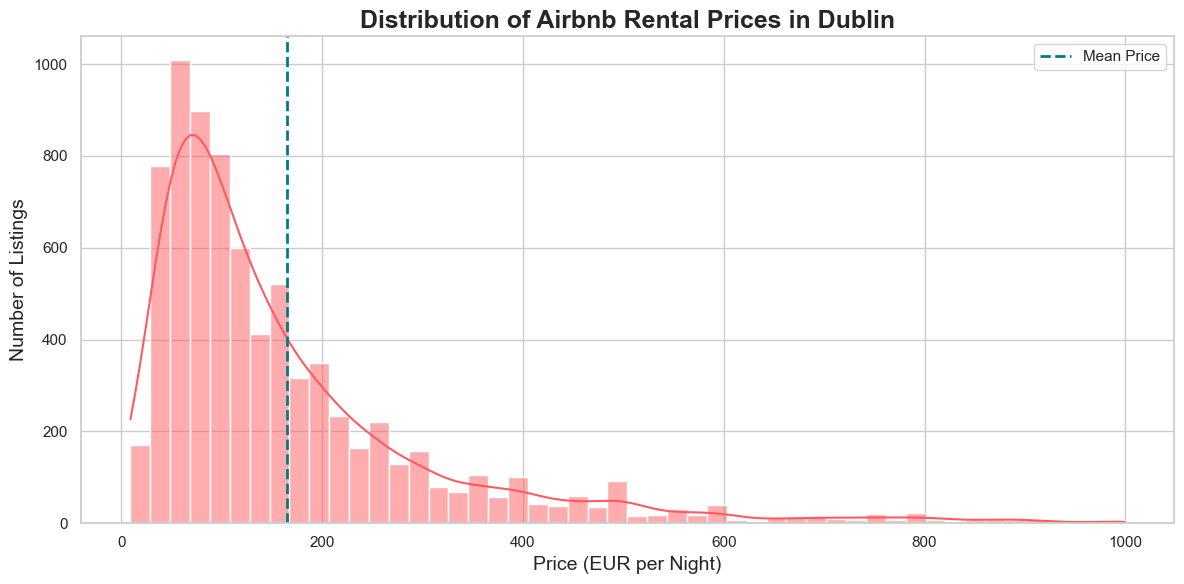

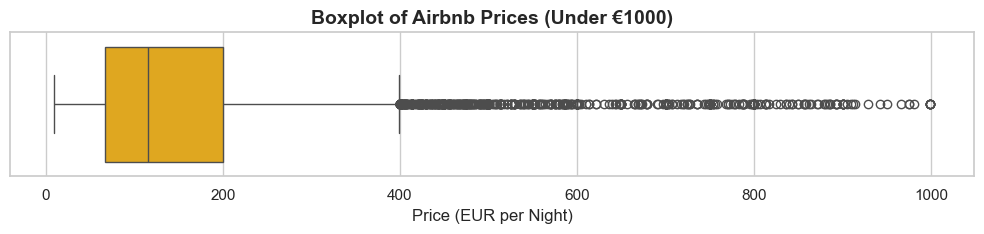

In [ ]:
#======================================================================================================================
#======================================================================================================================
#This is the part where we will be doing the data visualization
#We will be using seaborn and matplotlib for this
#We will be using the airbnb colors for the plots
#The colors are taken from the airbnb website and are used for the plots
#These visualizations are used to understand the data better and to get insights from the data
#======================================================================================================================
#======================================================================================================================



airbnb_red = '#FF5A5F'
airbnb_orange = '#FFB400'
airbnb_teal = '#007A87'
airbnb_purple = '#7B0051'


sns.set(style='whitegrid', palette='muted')
listings_df['price_cleaned'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)


filtered_df = listings_df[listings_df['price_cleaned'] < 1000]  


plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_df,
    x='price_cleaned',
    bins=50,
    kde=True,
    color=airbnb_red,
    edgecolor='white'
)

plt.title('Distribution of Airbnb Rental Prices in Dublin', fontsize=18, fontweight='bold')
plt.xlabel('Price (EUR per Night)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.axvline(filtered_df['price_cleaned'].mean(), color=airbnb_teal, linestyle='--', linewidth=2, label='Mean Price')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2.5))
sns.boxplot(
    x=filtered_df['price_cleaned'],
    color=airbnb_orange
)
plt.title('Boxplot of Airbnb Prices (Under €1000)', fontsize=14, fontweight='bold')
plt.xlabel('Price (EUR per Night)', fontsize=12)

plt.tight_layout()
plt.show()

neighbourhood_cleansed
Dn Laoghaire-Rathdown    50.887766
Fingal                   48.782803
Name: price_per_person, dtype: float64


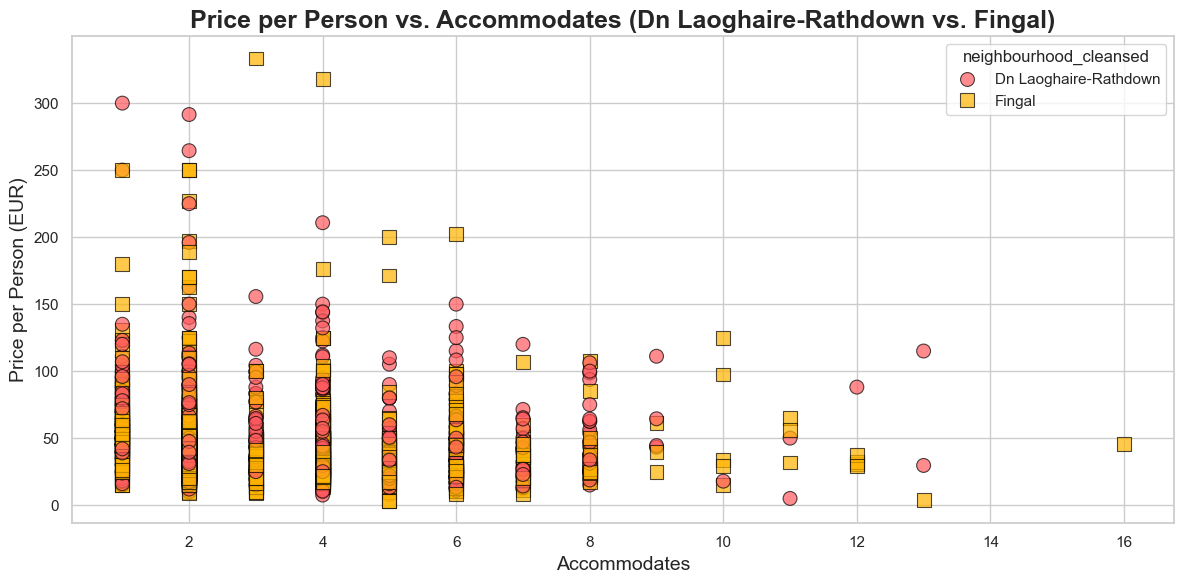

In [ ]:
#======================================================================================
#Comparison between Dun Laoghaire-Rathdown and Fingal's average rent price per person
#======================================================================================


listings_df['price_cleaned'] = listings_df['price'].replace('[\€,]', '', regex=True).astype(float)
listings_df['price_per_person'] = listings_df['price_cleaned'] / listings_df['accommodates']
filtered_neighborhoods = listings_df[listings_df['neighbourhood_cleansed'].isin(['Dn Laoghaire-Rathdown', 'Fingal'])]
avg_price_per_person = filtered_neighborhoods.groupby('neighbourhood_cleansed')['price_per_person'].mean()

print(avg_price_per_person)


sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='accommodates',  
    y='price_per_person', 
    hue='neighbourhood_cleansed',  
    data=filtered_neighborhoods,  
    palette=[airbnb_red, airbnb_orange],  
    style='neighbourhood_cleansed',  
    markers=["o", "s"],  
    s=100,  
    edgecolor='black',  
    alpha=0.7 
)
plt.title('Price per Person vs. Accommodates (Dn Laoghaire-Rathdown vs. Fingal)', fontsize=18, fontweight='bold')
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Price per Person (EUR)', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#======================================================================================
#Finding the host with the highest cumulative rental price
#======================================================================================

host_cumulative_price = listings_df.groupby('host_name')['price'].sum().reset_index()
host_cumulative_price_sorted = host_cumulative_price.sort_values(by='price', ascending=False)
top_host = host_cumulative_price_sorted.iloc[0]

print("Host with the highest cumulative rental price:")
print(f"Host: {top_host['host_name']}")
print(f"Cumulative Rental Price: €{top_host['price']:.2f}")

Host with the highest cumulative rental price:
Host: STK Homes
Cumulative Rental Price: €103620.00


  neighbourhood_cleansed  review_score_value
0  Dn Laoghaire-Rathdown            4.493971
1            Dublin City            4.408220
2                 Fingal            4.498649
3           South Dublin            3.141207


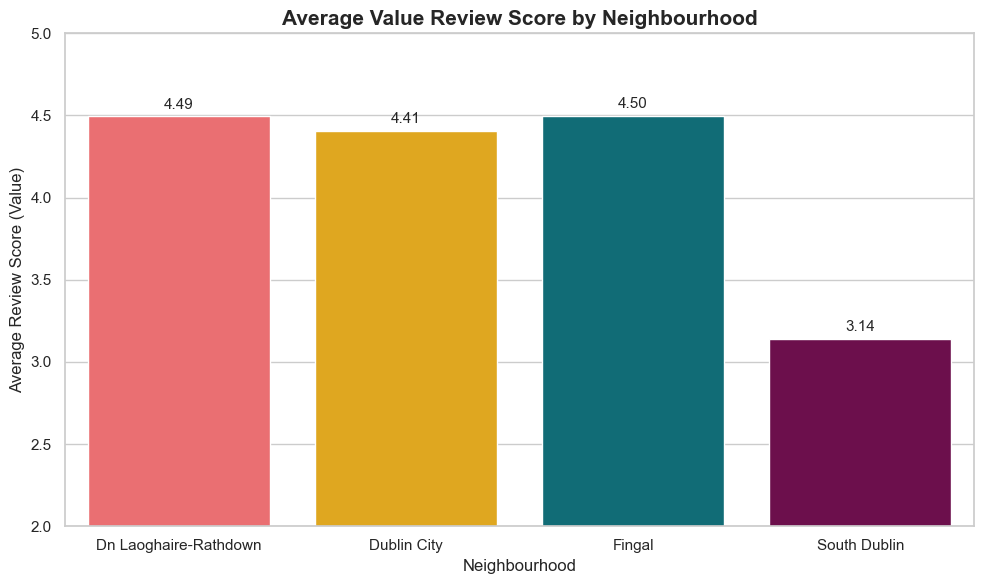

In [39]:
#======================================================================================
#Merge two dataframes to find the average review score per neighborhood and visualize it
#======================================================================================


listings_df['listing_id'] = listings_df['listing_id'].astype(str)
reviews_df['listing_id'] = reviews_df['listing_id'].astype(str)

merged_df = pd.merge(listings_df, reviews_df, on='listing_id')


average_review_score = merged_df.groupby('neighbourhood_cleansed')['review_score_value'].mean().reset_index()

print(average_review_score)

airbnb_colors = ['#FF5A5F', '#FFB400', '#007A87', '#7B0051']
verage_review_score = average_review_score.sort_values(by='review_score_value', ascending=False)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=average_review_score,
    x='neighbourhood_cleansed',
    y='review_score_value',
    hue='neighbourhood_cleansed',
    palette=airbnb_colors,
    dodge=False,
    legend=False
)


for index, row in average_review_score.iterrows():
    barplot.text(
        x=index,
        y=row['review_score_value'] + 0.03,
        s=f"{row['review_score_value']:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )


plt.title('Average Value Review Score by Neighbourhood', fontsize=15, fontweight='bold')
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Average Review Score (Value)', fontsize=12)
plt.ylim(2, 5)  
plt.tight_layout()
plt.show()

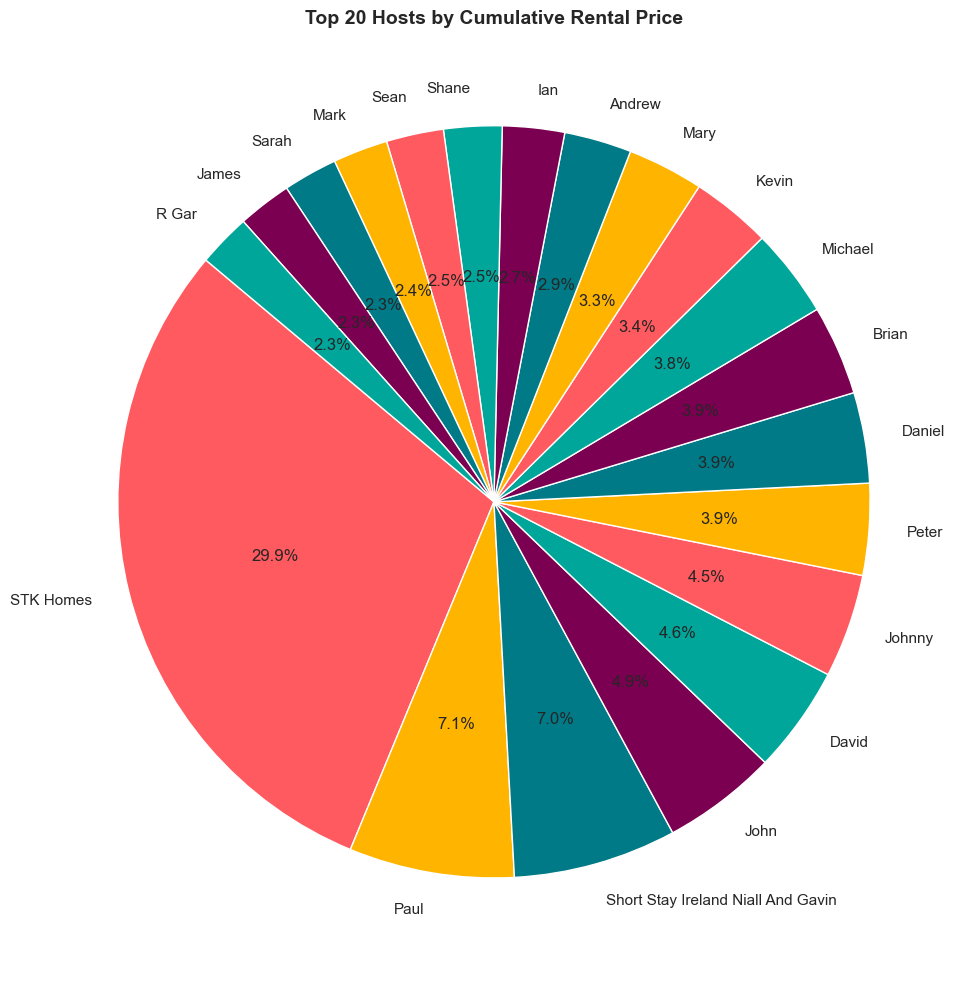

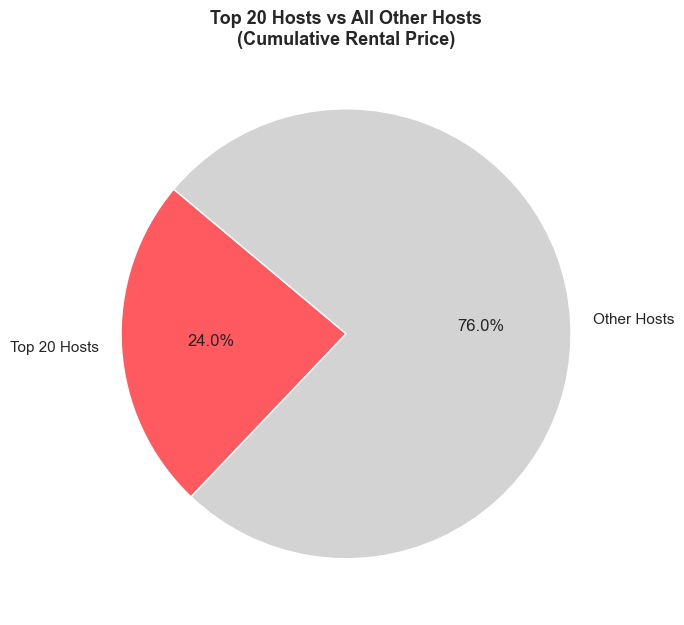

In [35]:
#======================================================================================
#Visualizing the top 20 hosts by cumulative rental price
#======================================================================================



airbnb_grey = 'lightgrey'
airbnb_green = '#00A699'
sns.set(style="whitegrid")


listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)


host_prices = listings_df.groupby('host_name')['price'].sum().sort_values(ascending=False)


top_20 = host_prices.head(20)
top_20_colors = ([airbnb_red, airbnb_orange, airbnb_teal, airbnb_purple, airbnb_green] * 4)[:20]

plt.figure(figsize=(10, 10))
plt.pie(
    top_20,
    labels=top_20.index,
    autopct='%1.1f%%',
    colors=top_20_colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Top 20 Hosts by Cumulative Rental Price', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


top_20_sum = top_20.sum()
other_sum = host_prices[20:].sum()
combined_data = pd.Series([top_20_sum, other_sum], index=['Top 20 Hosts', 'Other Hosts'])

plt.figure(figsize=(7, 7))
plt.pie(
    combined_data,
    labels=combined_data.index,
    autopct='%1.1f%%',
    colors=[airbnb_red, airbnb_grey],
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Top 20 Hosts vs All Other Hosts\n(Cumulative Rental Price)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()